In [17]:
# Distribución del precio de los juegos.
df_steam_games['price'].describe()

count    22528.000000
mean         8.968073
std         15.418669
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

Identificacion de outliers

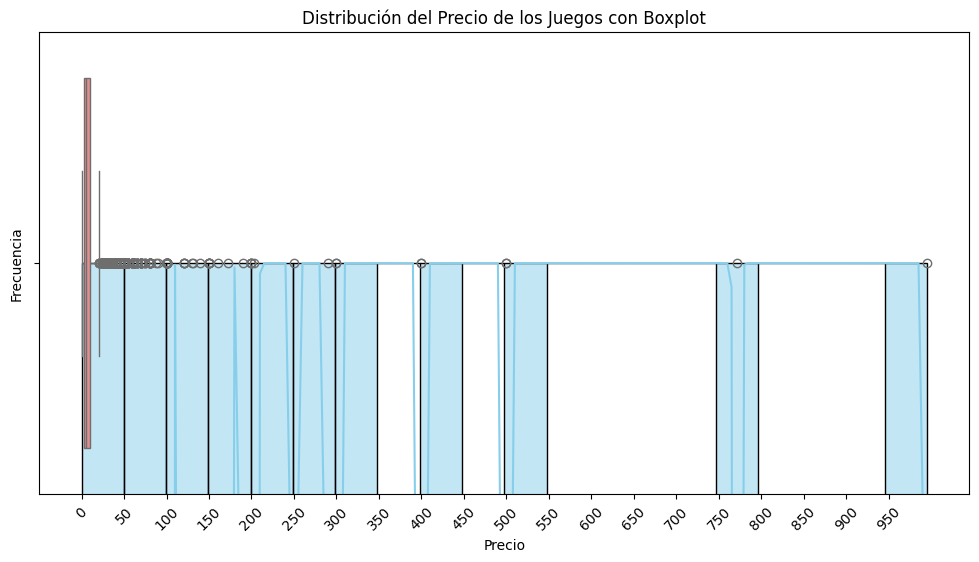

In [18]:
# Crear el gráfico de distribución con un boxplot
plt.figure(figsize=(12, 6))
sns.histplot(df_steam_games['price'], bins=20, kde=True, color='skyblue')
sns.boxplot(x=df_steam_games['price'], color='lightcoral')

# Personalizar el eje x para definir el espacio entre los ticks
plt.xticks(rotation=45)
plt.xticks(range(0, int(df_steam_games['price'].max()) + 1, 50))  

# Personalizar el gráfico
plt.title('Distribución del Precio de los Juegos con Boxplot')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


Tratamiento de outliers

In [19]:
# Calcular la media y la desviación estándar
mean_playtime = df_steam_games['price'].mean()
std_playtime = df_steam_games['price'].std()

# Definir el umbral para considerar outliers (por ejemplo, 3 desviaciones estándar)
threshold = 3

# Filtrar los outliers
df_steam_games = df_steam_games[(df_steam_games['price'] >= mean_playtime - threshold * std_playtime) & 
                            (df_steam_games['price'] <= mean_playtime + threshold * std_playtime)]


c:\Users\sebas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


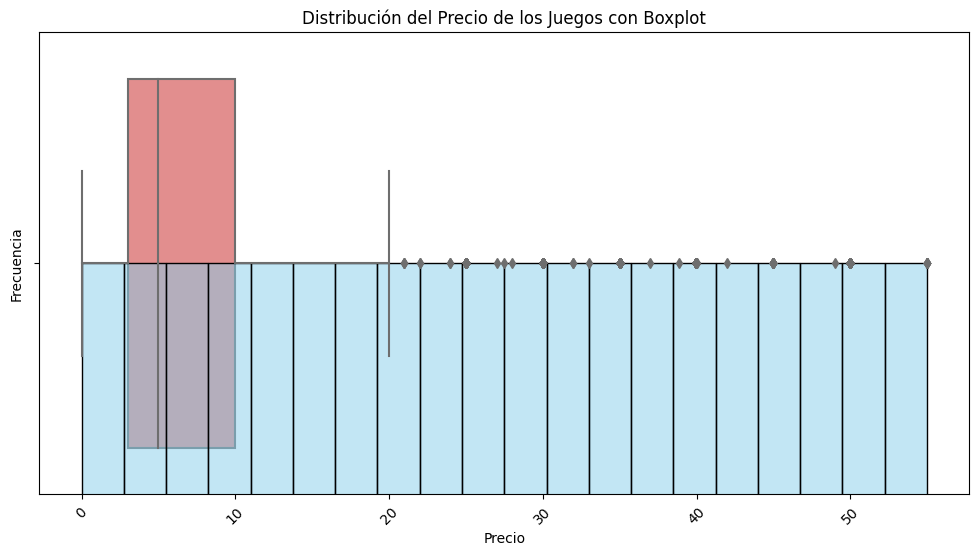

In [54]:
# Crear el gráfico de distribución con un boxplot
plt.figure(figsize=(12, 6))
sns.histplot(df_steam_games['price'], bins=20, kde=True, color='skyblue')
sns.boxplot(x=df_steam_games['price'], color='lightcoral')

# Personalizar el eje x para definir el espacio entre los ticks
plt.xticks(rotation=45)
plt.xticks(range(0, int(df_steam_games['price'].max()) + 1, 10))  # Aumentar la frecuencia de los ticks

# Personalizar el gráfico
plt.title('Distribución del Precio de los Juegos con Boxplot')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()



In [55]:
porcentaje_elimindos = ((len(steam_games) - len(df_steam_games)) / len(steam_games)) * 100

print(f"Se eliminó el {porcentaje_elimindos:.2f}% de los datos como outliers.")


Se eliminó el 0.84% de los datos como outliers.


TOP 15 desarrolladoras con mas cantidad de horas de juego

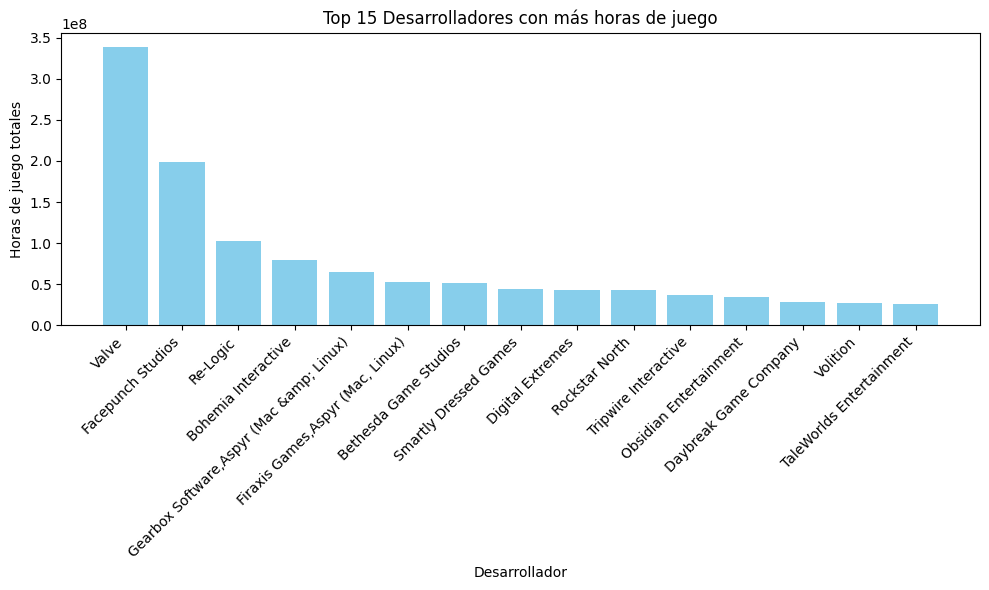

In [77]:
# Combinar DataFrames
df_combined = pd.merge(df_steam_games, df_user_items, on="item_id")

# Agrupar por desarrollador y sumar las horas de juego
df_developer_hours = df_combined.groupby("developer")["playtime_forever"].sum().reset_index()

# Obtener los 15 desarrolladores con más horas de juego
top_developers = df_developer_hours.nlargest(15, "playtime_forever")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_developers["developer"], top_developers["playtime_forever"], color='skyblue')
plt.xlabel('Desarrollador')
plt.ylabel('Horas de juego totales')
plt.title('Top 15 Desarrolladores con más horas de juego')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


top 15 juegos más jugados

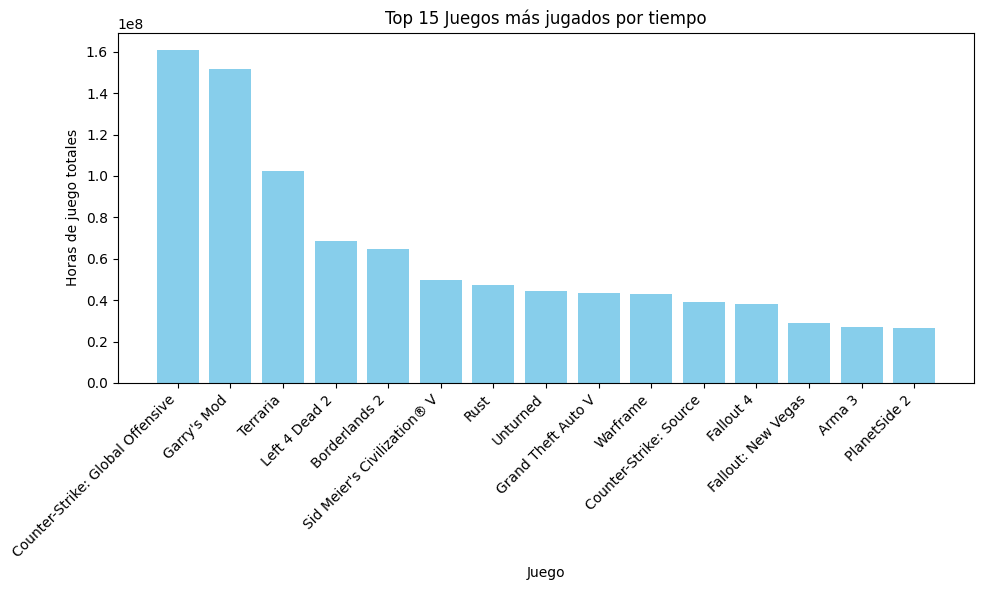

In [78]:
# Combinar DataFrames
df_combined = pd.merge(df_user_items, df_steam_games, on="item_id")

# Agrupar por juego y sumar las horas de juego
df_game_playtime = df_combined.groupby("title")["playtime_forever"].sum().reset_index()

# Obtener los top 15 juegos más jugados
top_15_games = df_game_playtime.nlargest(15, "playtime_forever")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_15_games["title"], top_15_games["playtime_forever"], color='skyblue')
plt.xlabel('Juego')
plt.ylabel('Horas de juego totales')
plt.title('Top 15 Juegos más jugados por tiempo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Top 15 tiempo de juego por genero

C:\Users\sebas\AppData\Local\Temp\ipykernel_4012\2097588476.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df[genre + '_playtime'] = merged_df[genre] * merged_df['playtime_forever']
C:\Users\sebas\AppData\Local\Temp\ipykernel_4012\2097588476.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df[genre + '_playtime'] = merged_df[genre] * merged_df['playtime_forever']
C:\Users\sebas\AppData\Local\Temp\ipykernel_4012\2097588476.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

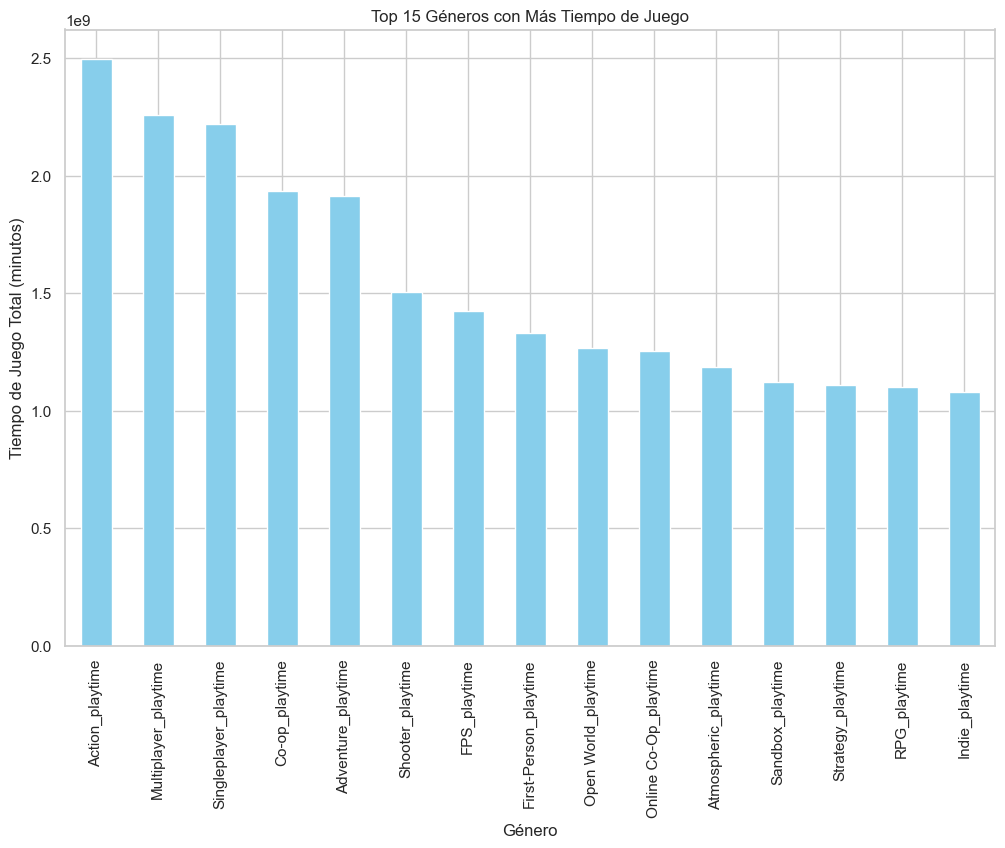

In [111]:
# Fusionar los conjuntos de datos df_genres y df_user_items
merged_df = pd.merge(df_genres, df_user_items, on='item_id')

# Multiplicar la columna playtime_forever por el género correspondiente
for genre in df_genres.columns[1:]:
    merged_df[genre + '_playtime'] = merged_df[genre] * merged_df['playtime_forever']

# Sumar el tiempo de juego para cada género
genre_playtime_sum = merged_df.groupby('user_id')[[genre + '_playtime' for genre in df_genres.columns[1:]]].sum()

# Calcular el total de tiempo de juego por género
total_playtime_per_genre = genre_playtime_sum.sum()

# Seleccionar los 15 géneros con más tiempo de juego
top_15_genres = total_playtime_per_genre.sort_values(ascending=False).head(15)

# Crear un gráfico de barras para los 15 géneros principales
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

top_15_genres.plot(kind='bar', color='skyblue')
plt.title('Top 15 Géneros con Más Tiempo de Juego')
plt.xlabel('Género')
plt.ylabel('Tiempo de Juego Total (minutos)')

plt.show()

# Guardamos los resultados en una lista
top_15_genres = total_playtime_per_genre.sort_values(ascending=False).head(15)
top_15_genres_list = top_15_genres.index.tolist()


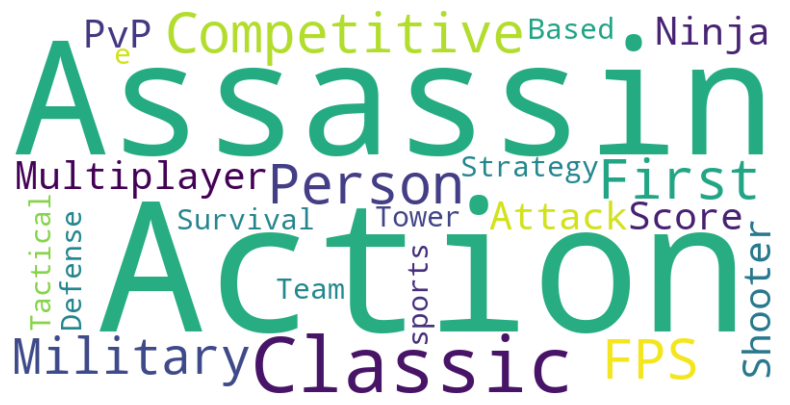

In [147]:
# Convertir las columnas a tipo entero
genres = genres.astype(int)

# Crear una cadena de texto con todos los géneros (excepto "Item_id"), considerando su frecuencia
text = ' '.join((genre + ' ') * count for genre, count in genres.iloc[0].items() if count > 0 and genre != 'item_id' and genre != '1980s')

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras utilizando Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2. Análisis Correlacional


Cálculo de medidas de correlación entre variables.

Pruebas de significancia para determinar si las relaciones entre variables son significativas.

Análisis de componentes principales para identificar las características más importantes.

Relación entre sentimiento de la reseña y tiempo de juego.

